In [2]:
import math
import pypot.dynamixel
from pypot.dynamixel.conversion import dxl_code
from pypot.dynamixel.conversion import dxl_decode
from time import sleep, time

from lib import Motor
import control_tables
from utils import read_from_file, dxl_decode_value

import matplotlib
import matplotlib.pyplot as plt
from utils import write_in_file
import numpy as np

## Setting up the motors

In [2]:
DXL_ID = 20
PORT = "/dev/ttyUSB0"
INPUT_TENSION = 12.78

configs = {
    "MX-106": {"resistance": 2.0, "torque_constant": 2.3593725498111775},
    "MX-64": {"resistance": 3.6, "torque_constant": 8.011176076962043},
}

In [3]:
# Setup shoulder
dxl_io = pypot.dynamixel.Dxl320IO(PORT)
motor = Motor(dxl_io, DXL_ID, control_tables.MX_106, configs['MX-106']['resistance'], configs['MX-106']['torque_constant'], INPUT_TENSION)

motor.torque_enabled = False
motor.mode = 11 # PWM Control mode
motor.torque_enabled = True

# Finding viscous friction coefficient

* Motor torque : $T_m = K I$
* Viscous friction torque : $T_v = -b \omega$

At constant angular speed, with $\omega \neq 0\ rad.s^{-1}$, and with no load on the motor, the following is true: $T_m = T_v$ hence:
$T_m = -b\omega$

We command the motor with increasing speed and measure the torque for each speed value. The rate of increase $b$ for the graph $T_m(\omega) = b\omega$ is the viscous friction coefficient.

In [3]:
speeds = np.array(read_from_file("txt_files/speeds.txt"))
torques = np.array(read_from_file("txt_files/torques.txt"))

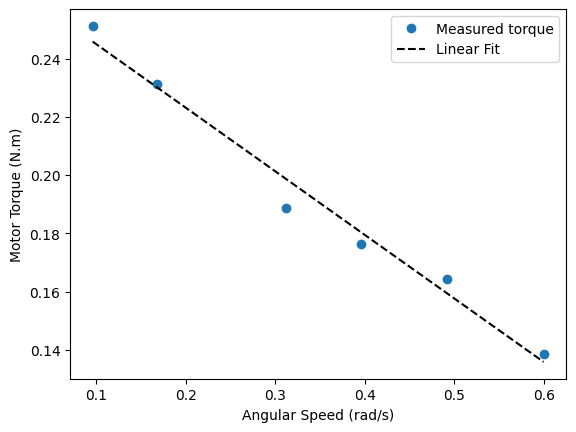

Constant = -0.2184 kg.m2.s-1


In [4]:
plt.figure()

plt.plot(speeds,torques, marker='o', label="Measured torque", linestyle='None')
slope, intersect = np.polyfit(speeds, torques, 1)
poly1d_fn = np.poly1d((slope, intersect))

plt.plot(speeds, poly1d_fn(speeds), '--k', label="Linear Fit")

plt.xlabel("Angular Speed (rad/s)")
plt.ylabel("Motor Torque (N.m)")
plt.legend()
plt.show()

print(f"Constant = {slope:.4f} kg.m2.s-1")

We find $b=0.218$ $kg.m^2.s^{-1}$ ; with the fitting of the Stribeck friction model done in the `benchmark_torque.ipynb` file, this coefficient is evaluated to $b=0.239$ $kg.m^2.s^{-1}$.